In [643]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [644]:
df = pd.read_csv(r'C:\Users\saavr\anaconda_projects\company_esg_financial_dataset.csv')

In [645]:
df.head()

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8


In [646]:
df.columns

Index(['CompanyID', 'CompanyName', 'Industry', 'Region', 'Year', 'Revenue',
       'ProfitMargin', 'MarketCap', 'GrowthRate', 'ESG_Overall',
       'ESG_Environmental', 'ESG_Social', 'ESG_Governance', 'CarbonEmissions',
       'WaterUsage', 'EnergyConsumption'],
      dtype='object')

In [647]:
df.shape

(11000, 16)

In [648]:
len(df['CompanyName'].unique())

1000

In [649]:
df.isnull().sum()

CompanyID               0
CompanyName             0
Industry                0
Region                  0
Year                    0
Revenue                 0
ProfitMargin            0
MarketCap               0
GrowthRate           1000
ESG_Overall             0
ESG_Environmental       0
ESG_Social              0
ESG_Governance          0
CarbonEmissions         0
WaterUsage              0
EnergyConsumption       0
dtype: int64

##### Nulls are only there in the growth rate column for the growth rate in 2015 for all companies, thus the number of nulls is 100.

#### **EDA**

In [650]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          11000 non-null  int64  
 1   CompanyName        11000 non-null  object 
 2   Industry           11000 non-null  object 
 3   Region             11000 non-null  object 
 4   Year               11000 non-null  int64  
 5   Revenue            11000 non-null  float64
 6   ProfitMargin       11000 non-null  float64
 7   MarketCap          11000 non-null  float64
 8   GrowthRate         10000 non-null  float64
 9   ESG_Overall        11000 non-null  float64
 10  ESG_Environmental  11000 non-null  float64
 11  ESG_Social         11000 non-null  float64
 12  ESG_Governance     11000 non-null  float64
 13  CarbonEmissions    11000 non-null  float64
 14  WaterUsage         11000 non-null  float64
 15  EnergyConsumption  11000 non-null  float64
dtypes: float64(11), int64(

In [651]:
df.describe(include='all')

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
count,11000.000000,11000,11000,11000,11000.000000,11000.000000,11000.000000,11000.000000,10000.000000,11000.000000,11000.000000,11000.000000,11000.000000,1.100000e+04,1.100000e+04,1.100000e+04
unique,NaN,1000,9,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Company_1000,Healthcare,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,11,1331,1672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,2020.000000,4670.850591,10.900455,13380.622236,4.830370,54.615273,56.416991,55.660582,51.767655,1.271462e+06,5.600442e+05,1.165839e+07
std,288.688113,NaN,NaN,NaN,3.162421,9969.954369,8.758711,39922.870373,9.424787,15.893937,26.767233,23.356152,25.323370,5.067760e+06,1.565686e+06,5.095836e+07
min,1.000000,NaN,NaN,NaN,2015.000000,35.900000,-20.000000,1.800000,-36.000000,6.300000,0.000000,0.000000,0.000000,2.042200e+03,1.021100e+03,5.105500e+03
25%,250.750000,NaN,NaN,NaN,2017.000000,938.775000,5.300000,1098.525000,-1.325000,44.100000,34.700000,37.600000,30.775000,1.228530e+05,6.488467e+04,3.069161e+05
50%,500.500000,NaN,NaN,NaN,2020.000000,1902.300000,10.500000,3096.450000,4.900000,54.600000,55.600000,55.150000,52.100000,2.920734e+05,2.038805e+05,1.221745e+06
75%,750.250000,NaN,NaN,NaN,2023.000000,4342.625000,16.300000,9995.500000,11.000000,65.600000,79.000000,73.800000,73.000000,7.407311e+05,5.251880e+05,5.616437e+06


In [652]:
df['Industry'].nunique()

9

In [653]:
df['Industry'].unique()

array(['Retail', 'Transportation', 'Technology', 'Finance', 'Healthcare',
       'Energy', 'Consumer Goods', 'Utilities', 'Manufacturing'],
      dtype=object)

In [654]:
df.groupby('Industry')['CompanyName'].nunique()

Industry
Consumer Goods    116
Energy            108
Finance           113
Healthcare        121
Manufacturing     117
Retail            106
Technology         95
Transportation    117
Utilities         107
Name: CompanyName, dtype: int64

In [655]:
df.groupby('Region')['CompanyName'].nunique()

Region
Africa           133
Asia             152
Europe           140
Latin America    137
Middle East      147
North America    140
Oceania          151
Name: CompanyName, dtype: int64

In [656]:
df.sort_values(['CompanyID','Year'])

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,1000,Company_1000,Consumer Goods,Latin America,2021,3419.2,21.7,14416.7,0.4,52.2,67.2,46.3,43.1,498875.8,623594.7,2494378.8
10996,1000,Company_1000,Consumer Goods,Latin America,2022,3518.8,21.4,8078.9,2.9,51.9,68.7,44.7,42.3,506013.7,632517.1,2530068.4
10997,1000,Company_1000,Consumer Goods,Latin America,2023,3417.1,17.1,13263.4,-2.9,52.9,72.4,43.1,43.2,473561.5,591951.9,2367807.7
10998,1000,Company_1000,Consumer Goods,Latin America,2024,3183.2,15.7,6960.1,-6.8,52.0,72.4,40.5,42.9,441310.9,551638.6,2206554.3


##### Computing intensity variables

In [657]:
df['carbon_intensity'] = df['CarbonEmissions'] / df['Revenue']
df['water_intensity'] = df['WaterUsage'] / df['Revenue']
df['energy_intensity'] = df['EnergyConsumption'] / df['Revenue']

In [658]:
df.columns

Index(['CompanyID', 'CompanyName', 'Industry', 'Region', 'Year', 'Revenue',
       'ProfitMargin', 'MarketCap', 'GrowthRate', 'ESG_Overall',
       'ESG_Environmental', 'ESG_Social', 'ESG_Governance', 'CarbonEmissions',
       'WaterUsage', 'EnergyConsumption', 'carbon_intensity',
       'water_intensity', 'energy_intensity'],
      dtype='object')

In [659]:
for col in ['ESG_Overall', 'ESG_Environmental']:
    df[f'{col}_chg_1y'] = df.groupby('CompanyID')[col].diff(1)
    df[f'{col}_chg_3y'] = df.groupby('CompanyID')[col].diff(3)
    df[f'{col}_vol_3y'] = (df.groupby('CompanyID')[col].rolling(3).std().reset_index(level=0, drop=True))

In [660]:
df[['CompanyName','Year','ESG_Overall','ESG_Overall_chg_1y','ESG_Overall_chg_3y','ESG_Overall_vol_3y']].head(20)

,CompanyName,Year,ESG_Overall,ESG_Overall_chg_1y,ESG_Overall_chg_3y,ESG_Overall_vol_3y
0,Company_1,2015,57.0,NaN,NaN,NaN
1,Company_1,2016,56.7,-0.3,NaN,NaN
2,Company_1,2017,56.5,-0.2,NaN,0.251661
3,Company_1,2018,58.0,1.5,1.0,0.814453
4,Company_1,2019,56.6,-1.4,-0.1,0.838650
5,Company_1,2020,55.7,-0.9,-0.8,1.159023
6,Company_1,2021,55.6,-0.1,-2.4,0.550757
7,Company_1,2022,57.7,2.1,1.1,1.184624
8,Company_1,2023,57.8,0.1,2.1,1.242310
9,Company_1,2024,58.5,0.7,2.9,0.435890


#### ESG scores static or dynamic?

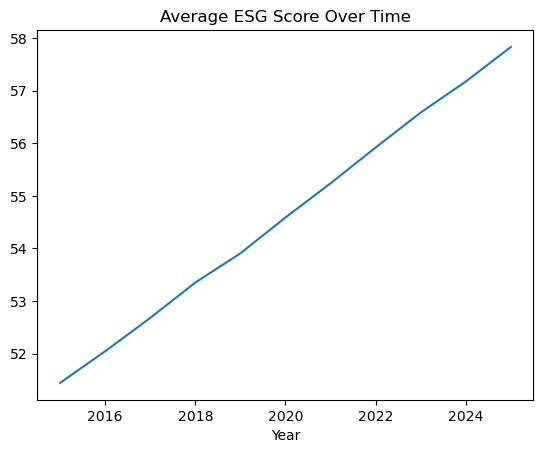

In [661]:
avg_esg = df.groupby('Year')['ESG_Overall'].mean()
avg_esg.plot(title='Average ESG Score Over Time')
plt.show()

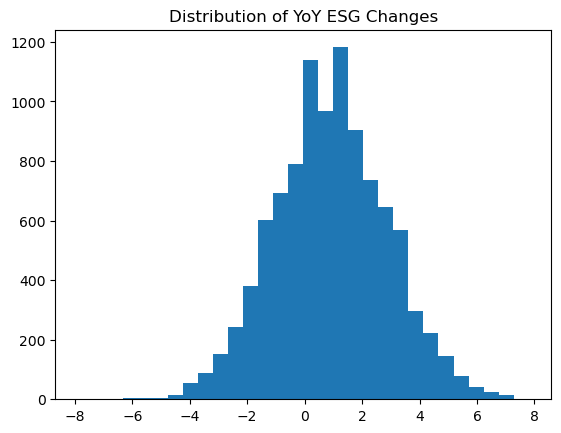

In [662]:
plt.hist(df['ESG_Environmental_chg_1y'], bins=30)
plt.title('Distribution of YoY ESG Changes')
plt.show()

ESG is increasing gradually, as can be seen by the first chart. The histogram of YoY change shows that the change in ESG is within a narrow band across companies. Since the distribution is centered slightly above 0, it can be said that a lot of firms are making very small ESG changes.

#### Industry Heterogeneity

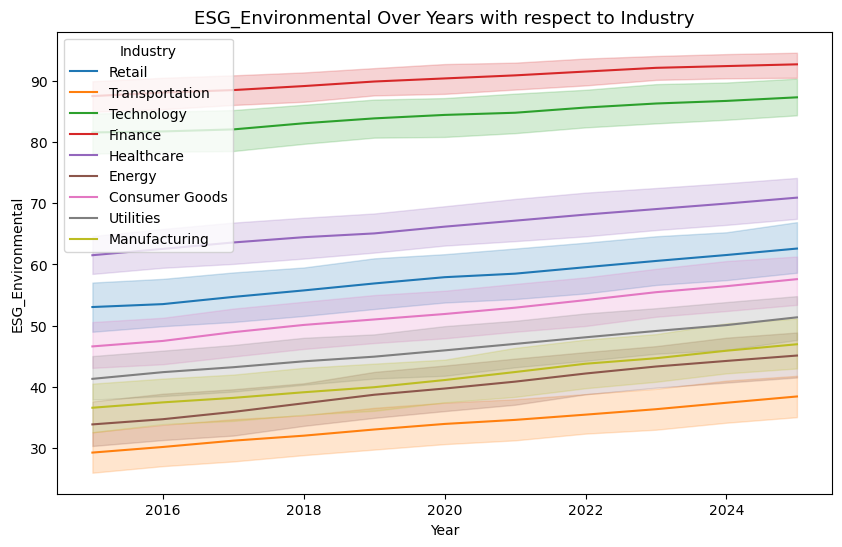

In [663]:
plt.figure(figsize=(10,6))
plt.title('ESG_Environmental Over Years with respect to Industry', fontsize=13)
sns.lineplot(x=df['Year'], y=df['ESG_Environmental'], color='tomato',hue=df['Industry'])
plt.show()

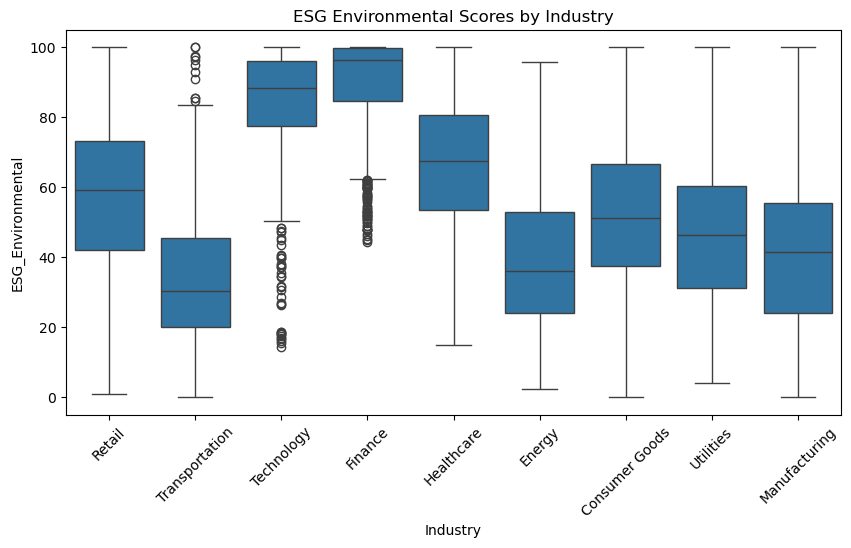

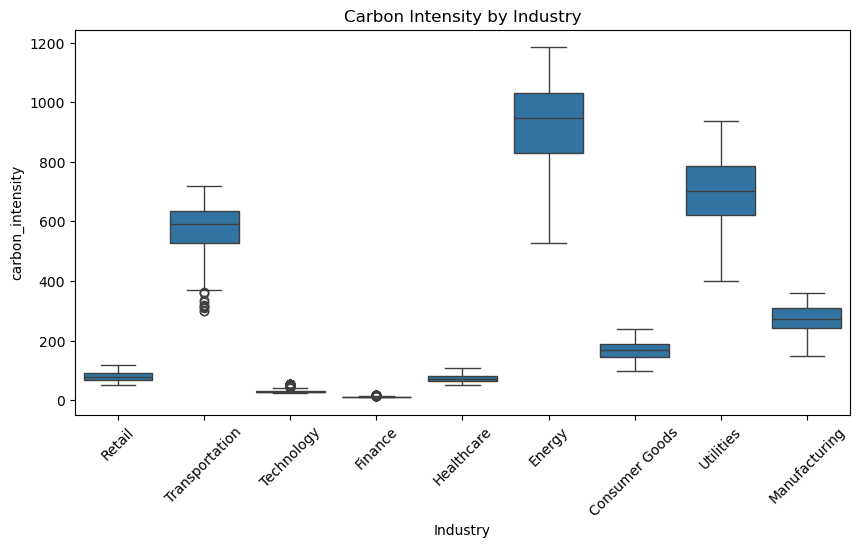

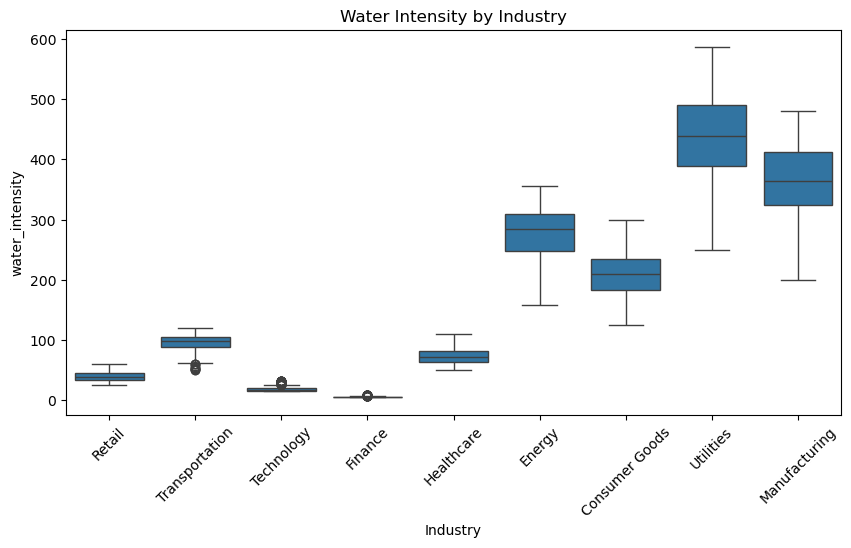

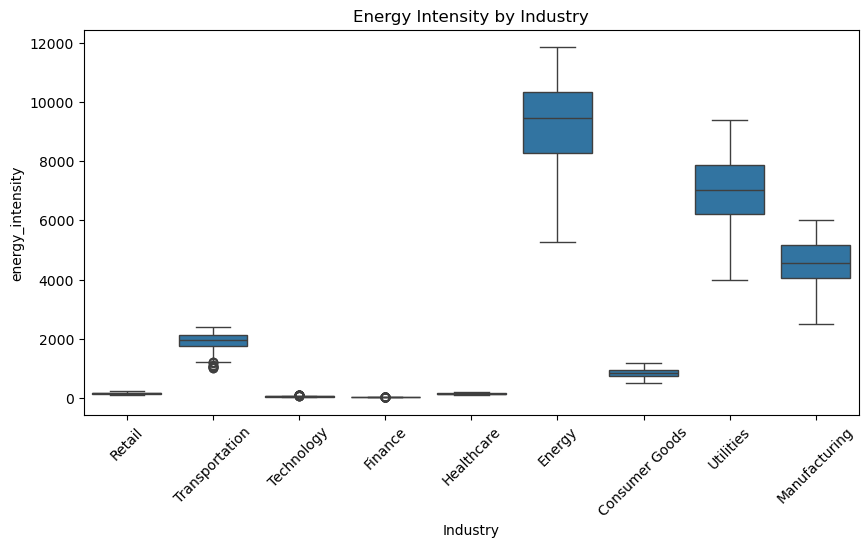

In [664]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Industry', y='ESG_Environmental')
plt.xticks(rotation=45)
plt.title('ESG Environmental Scores by Industry')
plt.show()


plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Industry', y='carbon_intensity')
plt.xticks(rotation=45)
plt.title('Carbon Intensity by Industry')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Industry', y='water_intensity')
plt.xticks(rotation=45)
plt.title('Water Intensity by Industry')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Industry', y='energy_intensity')
plt.xticks(rotation=45)
plt.title('Energy Intensity by Industry')
plt.show()

Industry-level EDA shows ESG environmental scores are systematically higher in low-impact sectors, while real environmental intensities are concentrated in energy and utilities. This suggests ESG scores are not directly comparable across industries and motivates industry-adjusted benchmarking and greenwashing detection.

#### ESG Level versus Momentum

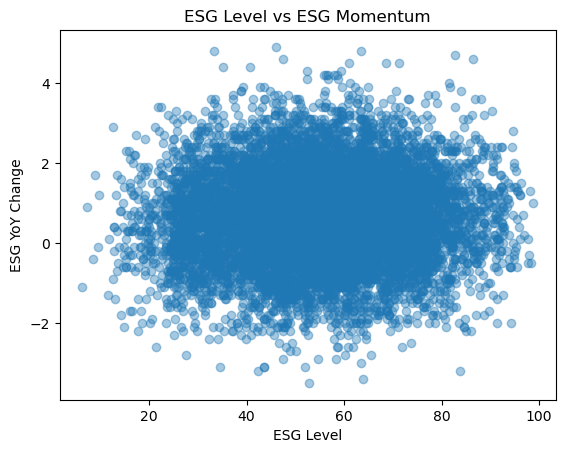

In [665]:
plt.scatter(df['ESG_Overall'], df['ESG_Overall_chg_1y'], alpha=0.4)
plt.xlabel('ESG Level')
plt.ylabel('ESG YoY Change')
plt.title('ESG Level vs ESG Momentum')
plt.show()

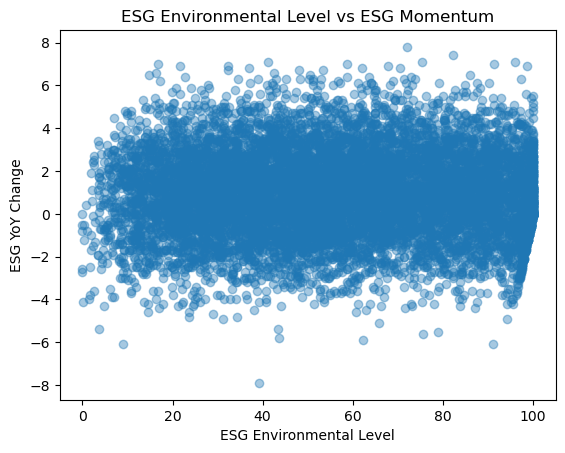

In [666]:
plt.scatter(df['ESG_Environmental'], df['ESG_Environmental_chg_1y'], alpha=0.4)
plt.xlabel('ESG Environmental Level')
plt.ylabel('ESG YoY Change')
plt.title('ESG Environmental Level vs ESG Momentum')
plt.show()

In [667]:
df = df.sort_values(['CompanyID', 'Year'])
df['ESG_Environmental_lag1'] = (df.groupby('CompanyID')['ESG_Environmental'].shift(1))

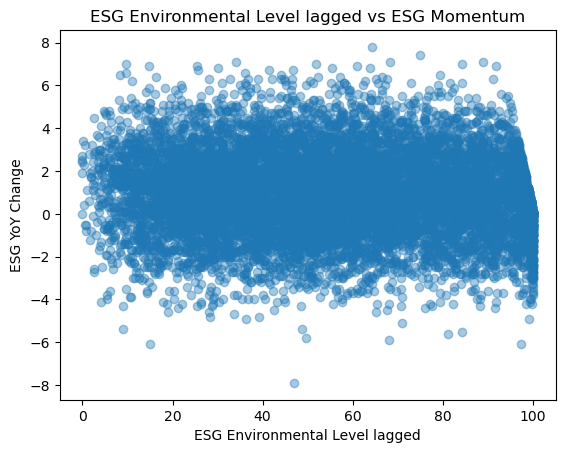

In [668]:
plt.scatter(df['ESG_Environmental_lag1'], df['ESG_Environmental_chg_1y'], alpha=0.4)
plt.xlabel('ESG Environmental Level lagged')
plt.ylabel('ESG YoY Change')
plt.title('ESG Environmental Level lagged vs ESG Momentum')
plt.show()

Scatter plots of ESG level versus momentum show no strong relationship, suggesting ESG improvements are largely independent of a firm’s current ESG standing. This indicates that ESG level and change must be treated as distinct variables.

#### Environmental Improvements versus ESG Score Changes

In [669]:
df['carbon_intensity_chg_1y'] = df.groupby('CompanyID')['carbon_intensity'].diff(1)

In [670]:
df['carbon_intensity_chg_1y'].skew()

np.float64(-1.263201335285439)

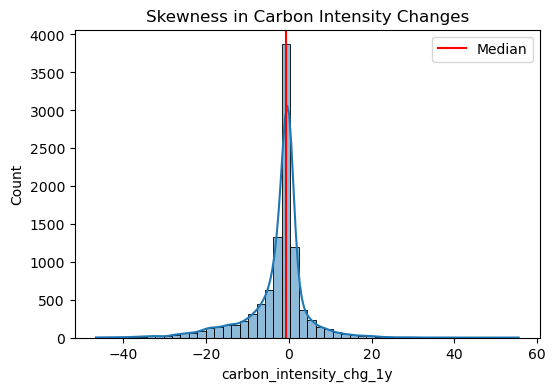

In [671]:
plt.figure(figsize=(6,4))
sns.histplot(df['carbon_intensity_chg_1y'], bins=50, kde=True)
plt.axvline(df['carbon_intensity_chg_1y'].median(), color='red', label='Median')
plt.title('Skewness in Carbon Intensity Changes')
plt.legend()
plt.show()

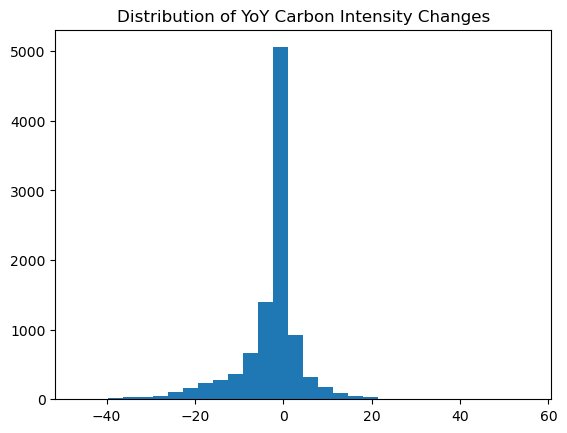

In [672]:
plt.hist(df['carbon_intensity_chg_1y'], bins=30)
plt.title('Distribution of YoY Carbon Intensity Changes')
plt.show()

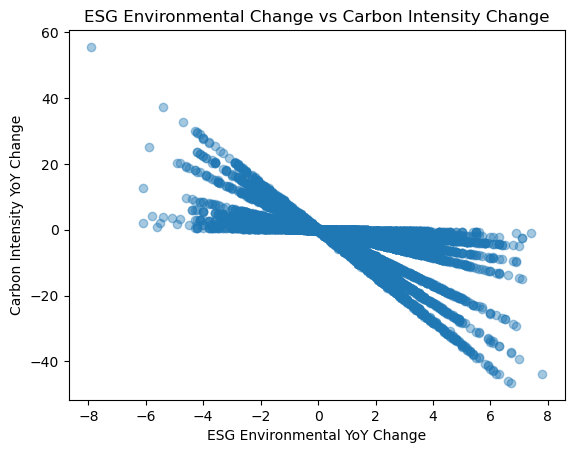

In [673]:
plt.scatter(df['ESG_Environmental_chg_1y'], df['carbon_intensity_chg_1y'], alpha=0.4)
plt.xlabel('ESG Environmental YoY Change')
plt.ylabel('Carbon Intensity YoY Change')
plt.title('ESG Environmental Change vs Carbon Intensity Change')
plt.show()

ESG environmental improvements are strongly associated with reductions in carbon intensity for some companies. But, this relationship also shows probable greenwashing, as the flatter stripes indicate that even though the change in carbon intensity is negligible, the ESG score is improving. 

In [674]:
df['energy_intensity_chg_1y'] = df.groupby('CompanyID')['energy_intensity'].diff(1)

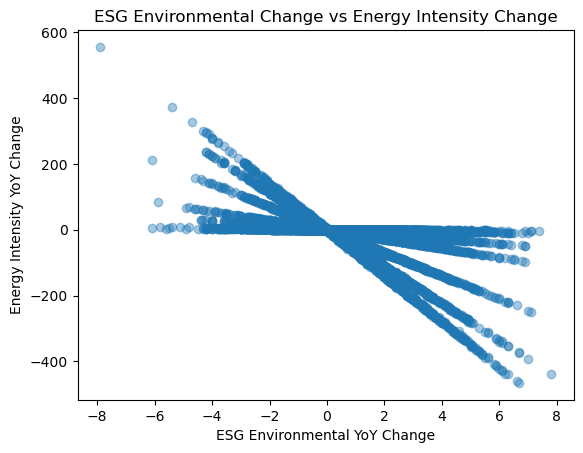

In [675]:
plt.scatter(df['ESG_Environmental_chg_1y'], df['energy_intensity_chg_1y'], alpha=0.4)
plt.xlabel('ESG Environmental YoY Change')
plt.ylabel('Energy Intensity YoY Change')
plt.title('ESG Environmental Change vs Energy Intensity Change')
plt.show()

#### Trade-off between ESG Improvements and Financials

In [676]:
df['rev_growth_t1'] = df.groupby('CompanyID')['Revenue'].pct_change().shift(-1)
df['margin_t1'] = df.groupby('CompanyID')['ProfitMargin'].shift(-1)
df['mcap_growth_t1']= df.groupby('CompanyID')['MarketCap'].pct_change().shift(-1)

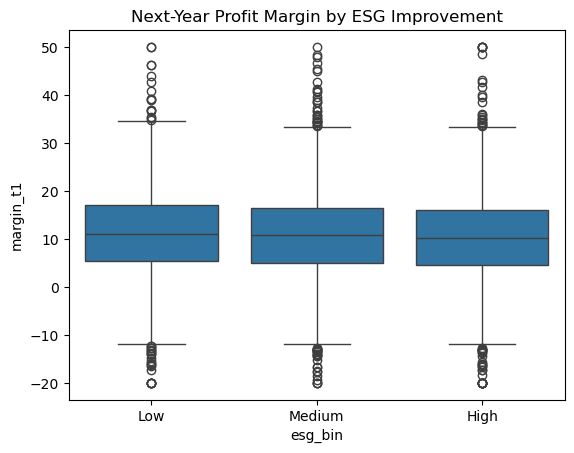

In [677]:
df['esg_bin'] = pd.qcut(df['ESG_Overall_chg_1y'], 3, labels=['Low', 'Medium', 'High'])

sns.boxplot(data=df, x='esg_bin', y='margin_t1')
plt.title('Next-Year Profit Margin by ESG Improvement')
plt.show()

ESG improvement does not appear to impose systematic short-term profitability costs.

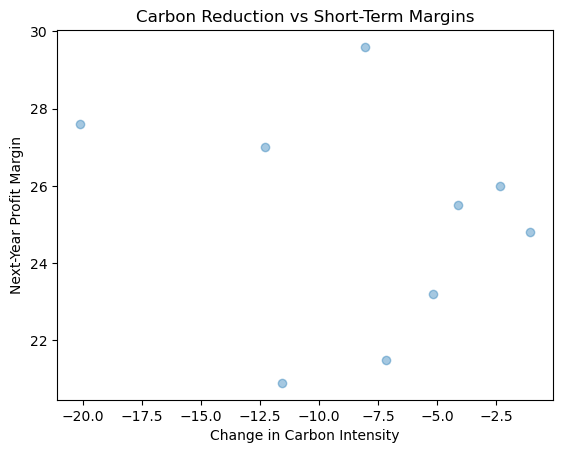

In [678]:
plt.scatter(df[df['CompanyName'] == 'Company_50']['energy_intensity_chg_1y'], df[df['CompanyName'] == 'Company_50']['margin_t1'], alpha=0.4)
plt.xlabel('Change in Carbon Intensity')
plt.ylabel('Next-Year Profit Margin')
plt.title('Carbon Reduction vs Short-Term Margins')
plt.show()

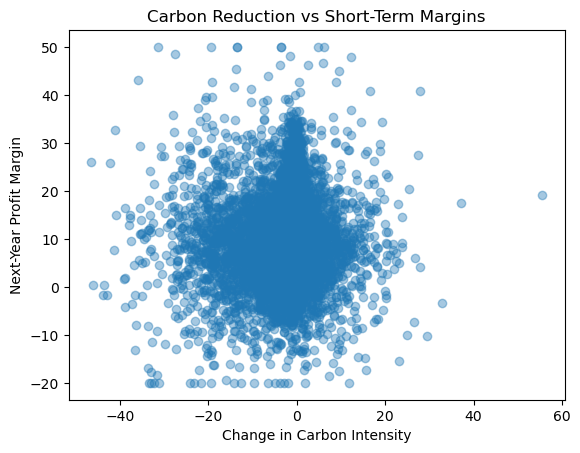

In [679]:
plt.scatter(df['carbon_intensity_chg_1y'], df['margin_t1'], alpha=0.4)
plt.xlabel('Change in Carbon Intensity')
plt.ylabel('Next-Year Profit Margin')
plt.title('Carbon Reduction vs Short-Term Margins')
plt.show()

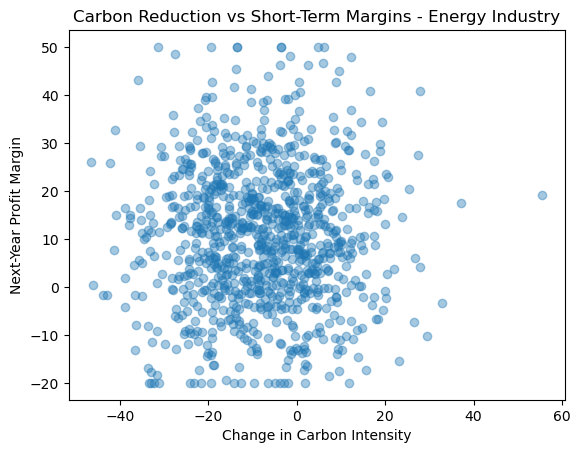

In [680]:
plt.scatter(df[df['Industry'] == 'Energy']['carbon_intensity_chg_1y'], df[df['Industry'] == 'Energy']['margin_t1'], alpha=0.4)
plt.xlabel('Change in Carbon Intensity')
plt.ylabel('Next-Year Profit Margin')
plt.title('Carbon Reduction vs Short-Term Margins - Energy Industry')
plt.show()

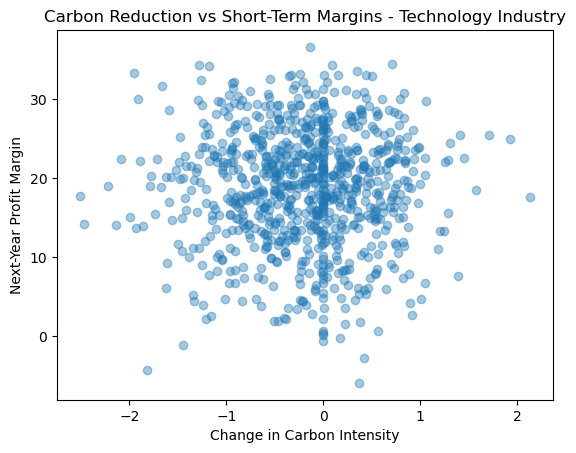

In [681]:
plt.scatter(df[df['Industry'] == 'Technology']['carbon_intensity_chg_1y'], df[df['Industry'] == 'Technology']['margin_t1'], alpha=0.4)
plt.xlabel('Change in Carbon Intensity')
plt.ylabel('Next-Year Profit Margin')
plt.title('Carbon Reduction vs Short-Term Margins - Technology Industry')
plt.show()

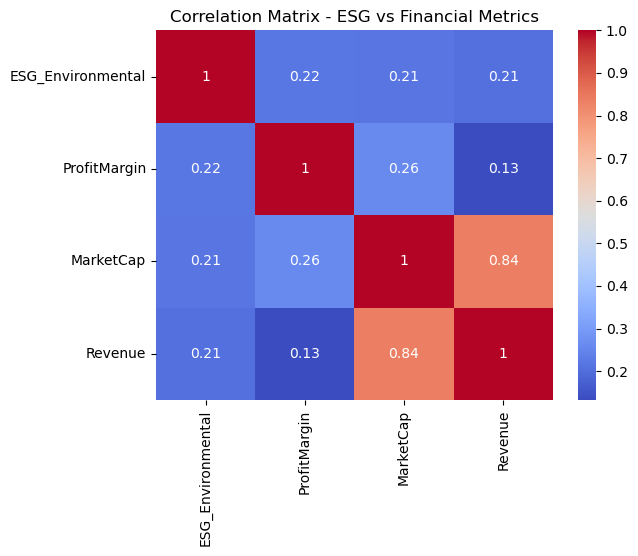

In [682]:
selected_cols = df[['ESG_Environmental', 'ProfitMargin', 'MarketCap', 'Revenue']]
corr = selected_cols.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - ESG vs Financial Metrics")
plt.show()

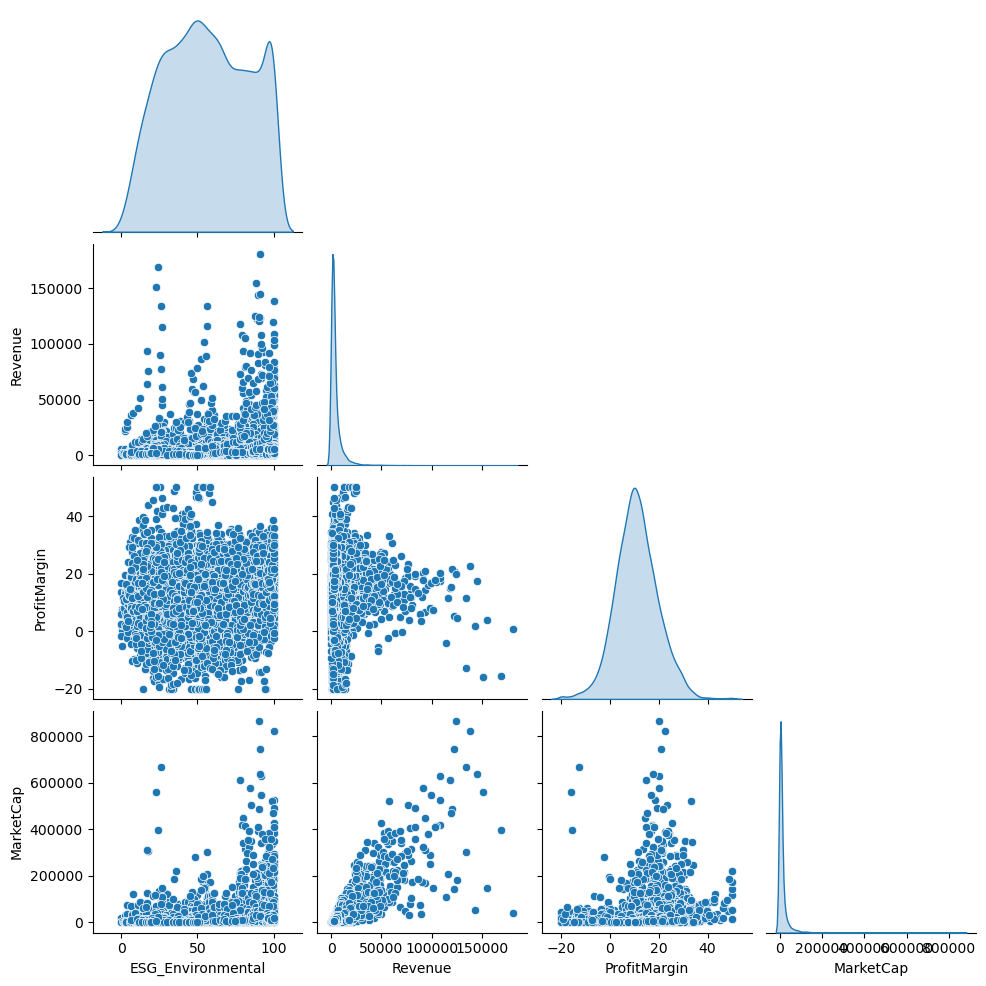

In [683]:
sns.pairplot(df[['ESG_Environmental', 'Revenue', 'ProfitMargin', 'MarketCap']], diag_kind='kde', corner=True)
plt.show()

No clear relationship between carbon reduction and short term profit margins. Firms show heterogenous effects of change in carbon intensity on profit margins

##### Based on the EDA, we hypothesize that ESG improvements are gradual and heterogenous, but do reflect real environmental actions. Their short-term financial impact is neither uniformly negative nor immediate, and is instead shaped by firm- and industry-level heterogeneity.

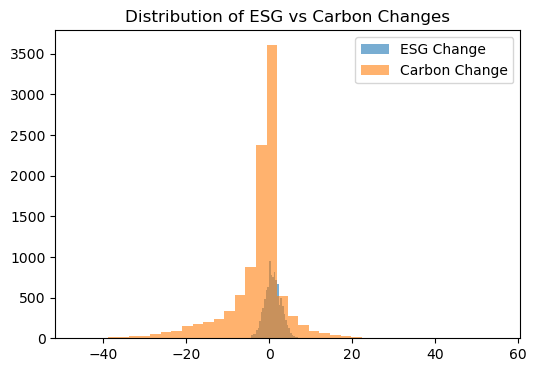

In [684]:
plt.figure(figsize=(6,4))
plt.hist(df['ESG_Environmental_chg_1y'], bins=40, alpha=0.6, label='ESG Change')
plt.hist(df['carbon_intensity_chg_1y'], bins=40, alpha=0.6, label='Carbon Change')
plt.legend()
plt.title('Distribution of ESG vs Carbon Changes')
plt.show()

In [685]:
df['esg_env_z'] = (df['ESG_Environmental_chg_1y'] - df['ESG_Environmental_chg_1y'].mean())/df['ESG_Environmental_chg_1y'].std()
df['carbon_intensity_z'] = (df['carbon_intensity_chg_1y'] - df['carbon_intensity_chg_1y'].mean())/df['carbon_intensity_chg_1y'].std()

In [686]:
df['carbon_robust'] = (
    df['carbon_intensity_chg_1y'] - df['carbon_intensity_chg_1y'].median()
) / (df['carbon_intensity_chg_1y'].quantile(0.75) - 
     df['carbon_intensity_chg_1y'].quantile(0.25))


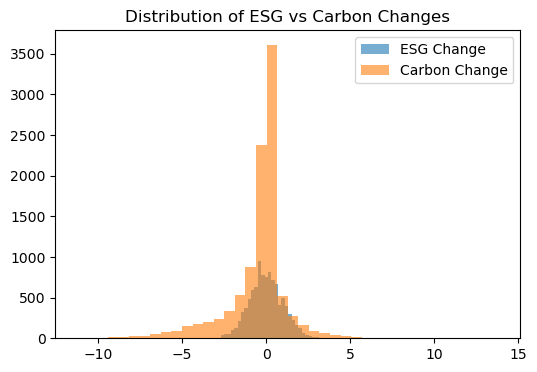

In [687]:
plt.figure(figsize=(6,4))
plt.hist(df['esg_env_z'], bins=40, alpha=0.6, label='ESG Change')
plt.hist(df['carbon_robust'], bins=40, alpha=0.6, label='Carbon Change')
plt.legend()
plt.title('Distribution of ESG vs Carbon Changes')
plt.show()

##### Feature Engineering

In [688]:
df['carbon_dir'] = np.sign(df['carbon_intensity_chg_1y'])
df['carbon_mag'] = np.abs(df['carbon_intensity_chg_1y'])
df['esg_env_lag1'] = df.groupby('CompanyID')['ESG_Environmental'].shift(1)
df['carbon_shock_log'] = np.sign(df['carbon_intensity_chg_1y']) * np.log1p(np.abs(df['carbon_intensity_chg_1y']))
df['carbon_intensity_ind_adj'] = (df['carbon_intensity_chg_1y'] - df.groupby(['Industry', 'Year'])['carbon_intensity_chg_1y'].transform('median'))
# df['ESG_Environmental_ind_adj'] = (df['ESG_Environmental_chg_1y'] - df.groupby(['Industry', 'Year'])['ESG_Environmental_chg_1y'].transform('median'))
df['carbon_consistency_3y'] = df.groupby('CompanyID')['carbon_dir'].rolling(3, min_periods=2).mean().reset_index(level=0, drop=True)
df['carbon_vol_3y'] = df.groupby('CompanyID')['carbon_shock_log'].rolling(3, min_periods=2).mean().reset_index(level=0, drop=True)

df['margin_lag1'] = df.groupby('CompanyID')['margin_t1'].shift(1)
df['margin_pressure'] = (df['margin_lag1'] < 0).astype(int)
df['greenwash_flag'] = ((df['ESG_Environmental_chg_1y'] > 0) & (df['carbon_dir'] >= 0)).astype(int)
# df['esg_carbon_divergence'] = (df['ESG_Environmental_chg_1y'] - (-df['carbon_shock_log']))

df['log_mcap'] = np.log1p(df['MarketCap'])

In [689]:
df[df['CompanyName'] == 'Company_1']['carbon_intensity_chg_1y']

0          NaN
1     1.279310
2     0.915220
3    -3.292327
4    -0.996973
5    -0.940913
6    -1.181055
7    -1.553672
8     0.472384
9    -0.433476
10   -1.213352
Name: carbon_intensity_chg_1y, dtype: float64

In [690]:
np.sign(df['carbon_intensity_chg_1y']) * np.log1p(np.abs(df['carbon_intensity_chg_1y']))

0             NaN
1        0.823873
2        0.649833
3       -1.456829
4       -0.691632
           ...   
10995    0.775671
10996   -1.131831
10997   -1.827308
10998    0.050421
10999   -1.362701
Name: carbon_intensity_chg_1y, Length: 11000, dtype: float64

#### Predicting the change in the ESG Environmental scores

In [691]:
df['carbon_consistency_3y'] = df['carbon_consistency_3y'].fillna(0)

In [692]:
df['carbon_vol_3y'] = (
    df.groupby('CompanyID')['carbon_vol_3y']
      .transform(lambda x: x.fillna(x.median()))
)

In [693]:
model_df = df.dropna(subset=['ESG_Environmental_chg_1y']).copy()

In [694]:
model_df = pd.get_dummies(model_df, columns=['Industry'], drop_first=True)

In [695]:
## Final Feature List
env_features = ['carbon_intensity', 'energy_intensity', 'water_intensity', 'carbon_dir', 'carbon_mag', 'carbon_shock_log', 'carbon_intensity_chg_1y', 'energy_intensity_chg_1y', 'carbon_intensity_ind_adj', 'carbon_consistency_3y', 'carbon_vol_3y']
esg_features = ['esg_env_lag1']
divergence_features = ['greenwash_flag']
firm_features = ['Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate', 'log_mcap', 'margin_lag1', 'margin_pressure']
industry_dummies = [c for c in model_df.columns if c.startswith('Industry_')]

In [696]:
all_features = (env_features + esg_features + divergence_features + firm_features + industry_dummies)
all_features = [f for f in all_features if f in model_df.columns]

In [697]:
X = model_df[all_features]
y = model_df['ESG_Environmental_chg_1y']

In [698]:
model_df.columns

Index(['CompanyID', 'CompanyName', 'Region', 'Year', 'Revenue', 'ProfitMargin',
       'MarketCap', 'GrowthRate', 'ESG_Overall', 'ESG_Environmental',
       'ESG_Social', 'ESG_Governance', 'CarbonEmissions', 'WaterUsage',
       'EnergyConsumption', 'carbon_intensity', 'water_intensity',
       'energy_intensity', 'ESG_Overall_chg_1y', 'ESG_Overall_chg_3y',
       'ESG_Overall_vol_3y', 'ESG_Environmental_chg_1y',
       'ESG_Environmental_chg_3y', 'ESG_Environmental_vol_3y',
       'ESG_Environmental_lag1', 'carbon_intensity_chg_1y',
       'energy_intensity_chg_1y', 'rev_growth_t1', 'margin_t1',
       'mcap_growth_t1', 'esg_bin', 'esg_env_z', 'carbon_intensity_z',
       'carbon_robust', 'carbon_dir', 'carbon_mag', 'esg_env_lag1',
       'carbon_shock_log', 'carbon_intensity_ind_adj', 'carbon_consistency_3y',
       'carbon_vol_3y', 'margin_lag1', 'margin_pressure', 'greenwash_flag',
       'log_mcap', 'Industry_Energy', 'Industry_Finance',
       'Industry_Healthcare', 'Industry_Man

In [699]:
X.columns

Index(['carbon_intensity', 'energy_intensity', 'water_intensity', 'carbon_dir',
       'carbon_mag', 'carbon_shock_log', 'carbon_intensity_chg_1y',
       'energy_intensity_chg_1y', 'carbon_intensity_ind_adj',
       'carbon_consistency_3y', 'carbon_vol_3y', 'esg_env_lag1',
       'greenwash_flag', 'Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate',
       'log_mcap', 'margin_lag1', 'margin_pressure', 'Industry_Energy',
       'Industry_Finance', 'Industry_Healthcare', 'Industry_Manufacturing',
       'Industry_Retail', 'Industry_Technology', 'Industry_Transportation',
       'Industry_Utilities'],
      dtype='object')

In [700]:
cutoff_year = model_df['Year'].quantile(0.9)

train_df = model_df[model_df['Year'] <= cutoff_year]
test_df = model_df[model_df['Year'] > cutoff_year]

X_train, y_train = train_df[all_features], train_df['ESG_Environmental_chg_1y']
X_test, y_test = test_df[all_features], test_df['ESG_Environmental_chg_1y']

In [701]:
from sklearn.preprocessing import StandardScaler

non_dummy_features = [f for f in all_features if not f.startswith('Industry_')]

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[non_dummy_features] = scaler.fit_transform(X_train[non_dummy_features])
X_test_scaled[non_dummy_features] = scaler.transform(X_test[non_dummy_features])

In [702]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(
    alpha=0.02,
    l1_ratio=0.5,
    random_state=42
)

model.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.02, random_state=42)

In [703]:
X_train_scaled.isnull().sum()

carbon_intensity            0
energy_intensity            0
water_intensity             0
carbon_dir                  0
carbon_mag                  0
carbon_shock_log            0
carbon_intensity_chg_1y     0
energy_intensity_chg_1y     0
carbon_intensity_ind_adj    0
carbon_consistency_3y       0
carbon_vol_3y               0
esg_env_lag1                0
greenwash_flag              0
Revenue                     0
ProfitMargin                0
MarketCap                   0
GrowthRate                  0
log_mcap                    0
margin_lag1                 0
margin_pressure             0
Industry_Energy             0
Industry_Finance            0
Industry_Healthcare         0
Industry_Manufacturing      0
Industry_Retail             0
Industry_Technology         0
Industry_Transportation     0
Industry_Utilities          0
dtype: int64

In [704]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = model.predict(X_test_scaled)

print("R²:", r2_score(y_test, y_pred))

R²: 0.753668432748224


In [705]:
coef_df = (
    pd.DataFrame({
        'feature': all_features,
        'coef': model.coef_
    })
    .sort_values(by='coef', key=abs, ascending=False)
)

coef_df.head(15)

,feature,coef
5,carbon_shock_log,-0.872702
3,carbon_dir,-0.650756
4,carbon_mag,0.326302
0,carbon_intensity,-0.321033
8,carbon_intensity_ind_adj,-0.282182
7,energy_intensity_chg_1y,0.200361
11,esg_env_lag1,-0.066442
6,carbon_intensity_chg_1y,-0.063104
26,Industry_Transportation,-0.011715
9,carbon_consistency_3y,-0.008925


#### Greenwashing Analysis

In [706]:
model_df.columns

Index(['CompanyID', 'CompanyName', 'Region', 'Year', 'Revenue', 'ProfitMargin',
       'MarketCap', 'GrowthRate', 'ESG_Overall', 'ESG_Environmental',
       'ESG_Social', 'ESG_Governance', 'CarbonEmissions', 'WaterUsage',
       'EnergyConsumption', 'carbon_intensity', 'water_intensity',
       'energy_intensity', 'ESG_Overall_chg_1y', 'ESG_Overall_chg_3y',
       'ESG_Overall_vol_3y', 'ESG_Environmental_chg_1y',
       'ESG_Environmental_chg_3y', 'ESG_Environmental_vol_3y',
       'ESG_Environmental_lag1', 'carbon_intensity_chg_1y',
       'energy_intensity_chg_1y', 'rev_growth_t1', 'margin_t1',
       'mcap_growth_t1', 'esg_bin', 'esg_env_z', 'carbon_intensity_z',
       'carbon_robust', 'carbon_dir', 'carbon_mag', 'esg_env_lag1',
       'carbon_shock_log', 'carbon_intensity_ind_adj', 'carbon_consistency_3y',
       'carbon_vol_3y', 'margin_lag1', 'margin_pressure', 'greenwash_flag',
       'log_mcap', 'Industry_Energy', 'Industry_Finance',
       'Industry_Healthcare', 'Industry_Man

In [707]:
# model_df['esg_pred'] = model.predict(scaler.transform(model_df[all_features]))
test_df = test_df.copy()

test_df['esg_pred'] = model.predict(X_test_scaled)
test_df['esg_residual'] = (test_df['ESG_Environmental_chg_1y'] - test_df['esg_pred'])

In [708]:
test_df['greenwash_model_flag'] = (
    (test_df['esg_residual'] > test_df['esg_residual'].quantile(0.75)) &
    (test_df['carbon_dir'] >= 0)
).astype(int)

In [709]:
test_df['greenwash_model_flag'].value_counts(normalize=True)* 100

greenwash_model_flag
0    91.1
1     8.9
Name: proportion, dtype: float64

In [710]:
industry_dummies

['Industry_Energy',
 'Industry_Finance',
 'Industry_Healthcare',
 'Industry_Manufacturing',
 'Industry_Retail',
 'Industry_Technology',
 'Industry_Transportation',
 'Industry_Utilities']

In [711]:
industry_flag_counts = {}

for col in industry_dummies:
    industry_flag_counts[col.replace('Industry_', '')] = (
        test_df[col] * test_df['greenwash_model_flag']
    ).sum()

industry_flag_counts = (
    pd.Series(industry_flag_counts)
      .sort_values(ascending=False)
)

In [712]:
industry_total_counts = {
    col.replace('Industry_', ''): test_df[col].sum()
    for col in industry_dummies
}

industry_share_flagged = (
    industry_flag_counts /
    pd.Series(industry_total_counts)
).sort_values(ascending=False)


In [713]:
industry_profile = pd.DataFrame({
    'flagged_firms': industry_flag_counts,
    'total_firms': pd.Series(industry_total_counts),
    'pct_flagged': (industry_share_flagged*100).round(0)
}).sort_values('pct_flagged', ascending=False)

industry_profile


,flagged_firms,total_firms,pct_flagged
Energy,29,108,27.0
Transportation,29,117,25.0
Utilities,25,107,23.0
Manufacturing,6,117,5.0
Healthcare,0,121,0.0
Finance,0,113,0.0
Technology,0,95,0.0
Retail,0,106,0.0


#### Checking Model Robustness

##### 1. Leaving one industry out in training, and testing on that

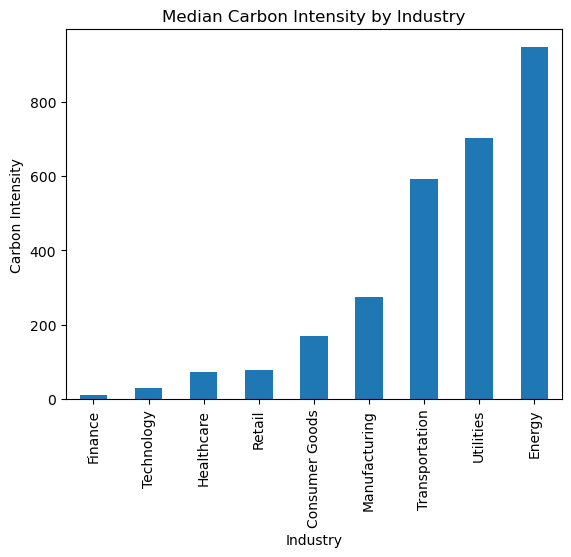

In [714]:
df.groupby('Industry')['carbon_intensity'].median().sort_values().plot(kind='bar')
plt.title('Median Carbon Intensity by Industry')
plt.ylabel('Carbon Intensity')
plt.show()

In [715]:
df.groupby('Industry')['CompanyID'].nunique().sort_values()

Industry
Technology         95
Retail            106
Utilities         107
Energy            108
Finance           113
Consumer Goods    116
Transportation    117
Manufacturing     117
Healthcare        121
Name: CompanyID, dtype: int64

In [716]:
# Split Utilities out-of-industry
train_df = model_df[model_df['Industry_Utilities'] == 0]
test_df  = model_df[model_df['Industry_Utilities'] == 1]

# Remove industry dummies from features
feature_cols = [f for f in all_features if not f.startswith('Industry_')]

X_train = train_df[feature_cols]
y_train = train_df['ESG_Environmental_chg_1y']

X_test  = test_df[feature_cols]
y_test  = test_df['ESG_Environmental_chg_1y']

In [717]:
from sklearn.preprocessing import StandardScaler

# Scale ONLY the features actually used in X
non_dummy_features = feature_cols.copy()

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

X_train_scaled[non_dummy_features] = scaler.fit_transform(X_train[non_dummy_features])
X_test_scaled[non_dummy_features]  = scaler.transform(X_test[non_dummy_features])

In [718]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(
    alpha=0.02,
    l1_ratio=0.5,
    random_state=42
)

model.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.02, random_state=42)

In [719]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = model.predict(X_test_scaled)

print("R²:", r2_score(y_test, y_pred))

R²: 0.7875020885148981


##### 2. Using a different set of variables

In [720]:
model_df = model_df.sort_values(['CompanyID', 'Year'])

model_df['ESG_Environmental_lag1'] = (
    model_df
    .groupby('CompanyID')['ESG_Environmental']
    .shift(1)
)

In [721]:
model_df['esg_carbon_divergence_lag'] = (
    model_df['ESG_Environmental_lag1'] -
    (-model_df['carbon_shock_log'].shift(1))
)

In [722]:
causal_features = [
    # --- ESG history (lagged only) ---
    'ESG_Environmental_lag1',
    'ESG_Environmental_vol_3y',
    'esg_carbon_divergence_lag',

    # --- Environmental footprint (levels) ---
    'carbon_intensity',
    'energy_intensity',
    'water_intensity',

    # --- Financial fundamentals ---
    'log_mcap',
    'Revenue',
    'ProfitMargin',
    'GrowthRate',
    'rev_growth_t1',
    'margin_lag1',

    # --- Industry controls ---
    'Industry_Energy',
    'Industry_Manufacturing',
    'Industry_Utilities',
    'Industry_Technology',
    'Industry_Finance',
    'Industry_Healthcare'
]

In [723]:
lag_features = [
    'ESG_Environmental_lag1',
    'ESG_Environmental_vol_3y',
    'esg_carbon_divergence_lag'
]

In [724]:
model_df_clean = model_df.dropna(subset=lag_features)

In [725]:
cutoff_year = model_df_clean['Year'].quantile(0.8)

train_df = model_df_clean[model_df_clean['Year'] <= cutoff_year]
test_df  = model_df_clean[model_df_clean['Year'] > cutoff_year]

X_train = train_df[feature_cols]
y_train = train_df['ESG_Environmental_chg_1y']

X_test  = test_df[feature_cols]
y_test  = test_df['ESG_Environmental_chg_1y']

In [726]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error

# Scale everything (ElasticNet needs it)
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

enet = ElasticNet(
    alpha=0.05,
    l1_ratio=0.5,
    random_state=42
)

enet.fit(X_train_scaled, y_train)

y_pred_enet = enet.predict(X_test_scaled)

print("ElasticNet R2:", r2_score(y_test, y_pred_enet))

ElasticNet R2: 0.7469846594402638


In [727]:
X_test.isnull().sum()

carbon_intensity            0
energy_intensity            0
water_intensity             0
carbon_dir                  0
carbon_mag                  0
carbon_shock_log            0
carbon_intensity_chg_1y     0
energy_intensity_chg_1y     0
carbon_intensity_ind_adj    0
carbon_consistency_3y       0
carbon_vol_3y               0
esg_env_lag1                0
greenwash_flag              0
Revenue                     0
ProfitMargin                0
MarketCap                   0
GrowthRate                  0
log_mcap                    0
margin_lag1                 0
margin_pressure             0
dtype: int64

In [728]:
X_train.isnull().sum()

carbon_intensity            0
energy_intensity            0
water_intensity             0
carbon_dir                  0
carbon_mag                  0
carbon_shock_log            0
carbon_intensity_chg_1y     0
energy_intensity_chg_1y     0
carbon_intensity_ind_adj    0
carbon_consistency_3y       0
carbon_vol_3y               0
esg_env_lag1                0
greenwash_flag              0
Revenue                     0
ProfitMargin                0
MarketCap                   0
GrowthRate                  0
log_mcap                    0
margin_lag1                 0
margin_pressure             0
dtype: int64

##### 3. Stress Test: Removing carbon variables

In [729]:
model_df.columns

Index(['CompanyID', 'CompanyName', 'Region', 'Year', 'Revenue', 'ProfitMargin',
       'MarketCap', 'GrowthRate', 'ESG_Overall', 'ESG_Environmental',
       'ESG_Social', 'ESG_Governance', 'CarbonEmissions', 'WaterUsage',
       'EnergyConsumption', 'carbon_intensity', 'water_intensity',
       'energy_intensity', 'ESG_Overall_chg_1y', 'ESG_Overall_chg_3y',
       'ESG_Overall_vol_3y', 'ESG_Environmental_chg_1y',
       'ESG_Environmental_chg_3y', 'ESG_Environmental_vol_3y',
       'ESG_Environmental_lag1', 'carbon_intensity_chg_1y',
       'energy_intensity_chg_1y', 'rev_growth_t1', 'margin_t1',
       'mcap_growth_t1', 'esg_bin', 'esg_env_z', 'carbon_intensity_z',
       'carbon_robust', 'carbon_dir', 'carbon_mag', 'esg_env_lag1',
       'carbon_shock_log', 'carbon_intensity_ind_adj', 'carbon_consistency_3y',
       'carbon_vol_3y', 'margin_lag1', 'margin_pressure', 'greenwash_flag',
       'log_mcap', 'Industry_Energy', 'Industry_Finance',
       'Industry_Healthcare', 'Industry_Man

In [730]:
carbon_features = [
    'carbon_intensity',
    'carbon_dir',
    'carbon_mag',
    'carbon_shock_log',
    'carbon_intensity_ind_adj',
    'carbon_consistency_3y'
]

baseline_features = [
    'ESG_Environmental_lag1',
    'ESG_Environmental_vol_3y',
    'esg_env_lag1',
    'energy_intensity',
    'water_intensity',
    'log_mcap',
    'Revenue',
    'ProfitMargin',
    'GrowthRate',
    # 'rev_growth_t1',
    'margin_lag1'
] + [c for c in model_df.columns if c.startswith('Industry_')]

In [731]:
model_df_clean = model_df.dropna(subset=lag_features)

In [732]:
features_with_carbon = baseline_features + carbon_features

cutoff_year = model_df['Year'].quantile(0.8)

train_df = model_df_clean[model_df_clean['Year'] <= cutoff_year]
test_df  = model_df_clean[model_df_clean['Year'] > cutoff_year]

X_train = train_df[features_with_carbon]
y_train = train_df['ESG_Environmental_chg_1y']

X_test  = test_df[features_with_carbon]
y_test  = test_df['ESG_Environmental_chg_1y']

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

model_full = ElasticNet(alpha=0.02, l1_ratio=0.5, random_state=42)
model_full.fit(X_train_s, y_train)

print("With carbon R2:", r2_score(y_test, model_full.predict(X_test_s)))

With carbon R2: 0.7727855794870696


In [733]:
features_with_carbon = baseline_features

cutoff_year = model_df['Year'].quantile(0.8)

train_df = model_df_clean[model_df_clean['Year'] <= cutoff_year]
test_df  = model_df_clean[model_df_clean['Year'] > cutoff_year]

X_train = train_df[features_with_carbon]
y_train = train_df['ESG_Environmental_chg_1y']

X_test  = test_df[features_with_carbon]
y_test  = test_df['ESG_Environmental_chg_1y']

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

model_full = ElasticNet(alpha=0.02, l1_ratio=0.5, random_state=42)
model_full.fit(X_train_s, y_train)

print("Without carbon R2:", r2_score(y_test, model_full.predict(X_test_s)))


Without carbon R2: 0.22005313392162118
